In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, pearsonr

import os
import time
import itertools

from glove.model import *

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import file names
files = os.listdir("data/SET3_Thirdtrial/")
files

['CDanc_CDmono12h_PROVIDET0.csv', 'CDevo_CDmono12h_PROVIDET0.csv']

# fit gLV models

In [3]:
exp_names = []
for file in files:
    # define strain name
    strain = file.split("_")[0]
    
    # import data
    df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
    df.sort_values(by=["Treatments", "Time"], inplace=True)
    
    # make sure that conditions have at least one measurement
    dfs = []
    for treatment, df_t in df.groupby("Treatments"):
        if df_t.shape[0] > 1:
            dfs.append(df_t)
    df = pd.concat(dfs)

    # determine species names 
    species = df.columns.values[2:]

    # instantiate gLV fit 
    model = gLV(species, df)

    # fit to data 
    model.fit()
    
    # list of parameter names 
    param_names = []
    for s1 in species:
        for s2 in species:
            param_names += [s1+"*"+s2]
    param_names = list(species) + param_names
    
    # plot parameter distribution
    n_species = len(species)
    Avec = model.params[n_species:]
    Aij_std = np.sqrt(np.diag(model.Ainv))[n_species:]

    plt.figure(figsize=(18,18))
    # set counter for parameter std. 
    k = 0

    for i in range(n_species):
        for j in range(n_species):
            plt.subplot(n_species, n_species, k+1)
            a = np.linspace(Avec[k]-np.std(Avec), Avec[k]+np.std(Avec))
            plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]))
            plt.axvline(x=0, c='k', alpha=.5)
            k += 1
            if j == 0:
                plt.ylabel(species[i], fontsize=18)
            if i == n_species-1:
                plt.xlabel(species[j], fontsize=18)
            #plt.xlim([-2,2])
    
    plt.suptitle(strain, fontsize=24)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("params/SET3/"+strain+".pdf")
    plt.close()
    
    # compute Wald test for each parameter
    std_errors = np.sqrt(np.diag(model.Ainv))
    walds = model.params/std_errors
    wald_p_vals = 2*norm.cdf(-np.abs(walds))

    # save to df 
    df = pd.DataFrame()
    df["Param name"] = param_names
    df["Param value"] = model.params
    df["Param stdv"]  = np.sqrt(np.diag(model.Ainv))
    df["Param p-value"] = wald_p_vals
    for j, param_name in enumerate(param_names):
        df[param_name]  = model.Ainv[:, j]
    df.to_csv("params/SET3/"+strain+".csv", index=False)

Total samples: 271, Initial regularization: 1.00e-03
Loss: 31.853, Residuals: -0.285
Loss: 16.700, Residuals: 0.148
Loss: 14.154, Residuals: 0.080
Loss: 10.455, Residuals: 0.044
Loss: 8.596, Residuals: 0.010
Loss: 8.314, Residuals: 0.030
Loss: 7.838, Residuals: 0.025
Loss: 7.272, Residuals: 0.032
Loss: 7.174, Residuals: 0.037
Loss: 7.010, Residuals: 0.034
Loss: 6.964, Residuals: 0.043
Loss: 6.878, Residuals: 0.039
Loss: 6.732, Residuals: 0.033
Loss: 6.698, Residuals: 0.041
Loss: 6.635, Residuals: 0.038
Loss: 6.530, Residuals: 0.031
Loss: 6.510, Residuals: 0.038
Loss: 6.473, Residuals: 0.035
Loss: 6.406, Residuals: 0.030
Loss: 6.402, Residuals: 0.036
Loss: 6.361, Residuals: 0.032
Loss: 6.287, Residuals: 0.026
Loss: 6.278, Residuals: 0.026
Loss: 6.200, Residuals: 0.020
Loss: 6.199, Residuals: 0.023
Loss: 6.186, Residuals: 0.023
Loss: 6.161, Residuals: 0.020
Loss: 6.133, Residuals: 0.018
Loss: 6.128, Residuals: 0.021
Loss: 6.090, Residuals: 0.015
Loss: 6.089, Residuals: 0.015
Loss: 6.087,

Loss: 1.953, Residuals: -0.007
Loss: 1.953, Residuals: -0.007
Loss: 1.953, Residuals: -0.007
Loss: 1.953, Residuals: -0.007
Loss: 1.952, Residuals: -0.007
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.952, Residuals: -0.008
Loss: 1.951, Residuals: -0.008
Loss: 1.951, Residuals: -0.008
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Loss: 1.951, Residuals: -0.009
Evidence -54.160
Updating hyper-parameters...
Total samples: 225, Updated regularization: 3.58e-01
Loss: 102.401, Residuals: -0.012
Loss: 101.719, Residuals: -0.011
Loss: 100.929, Residuals: -0.

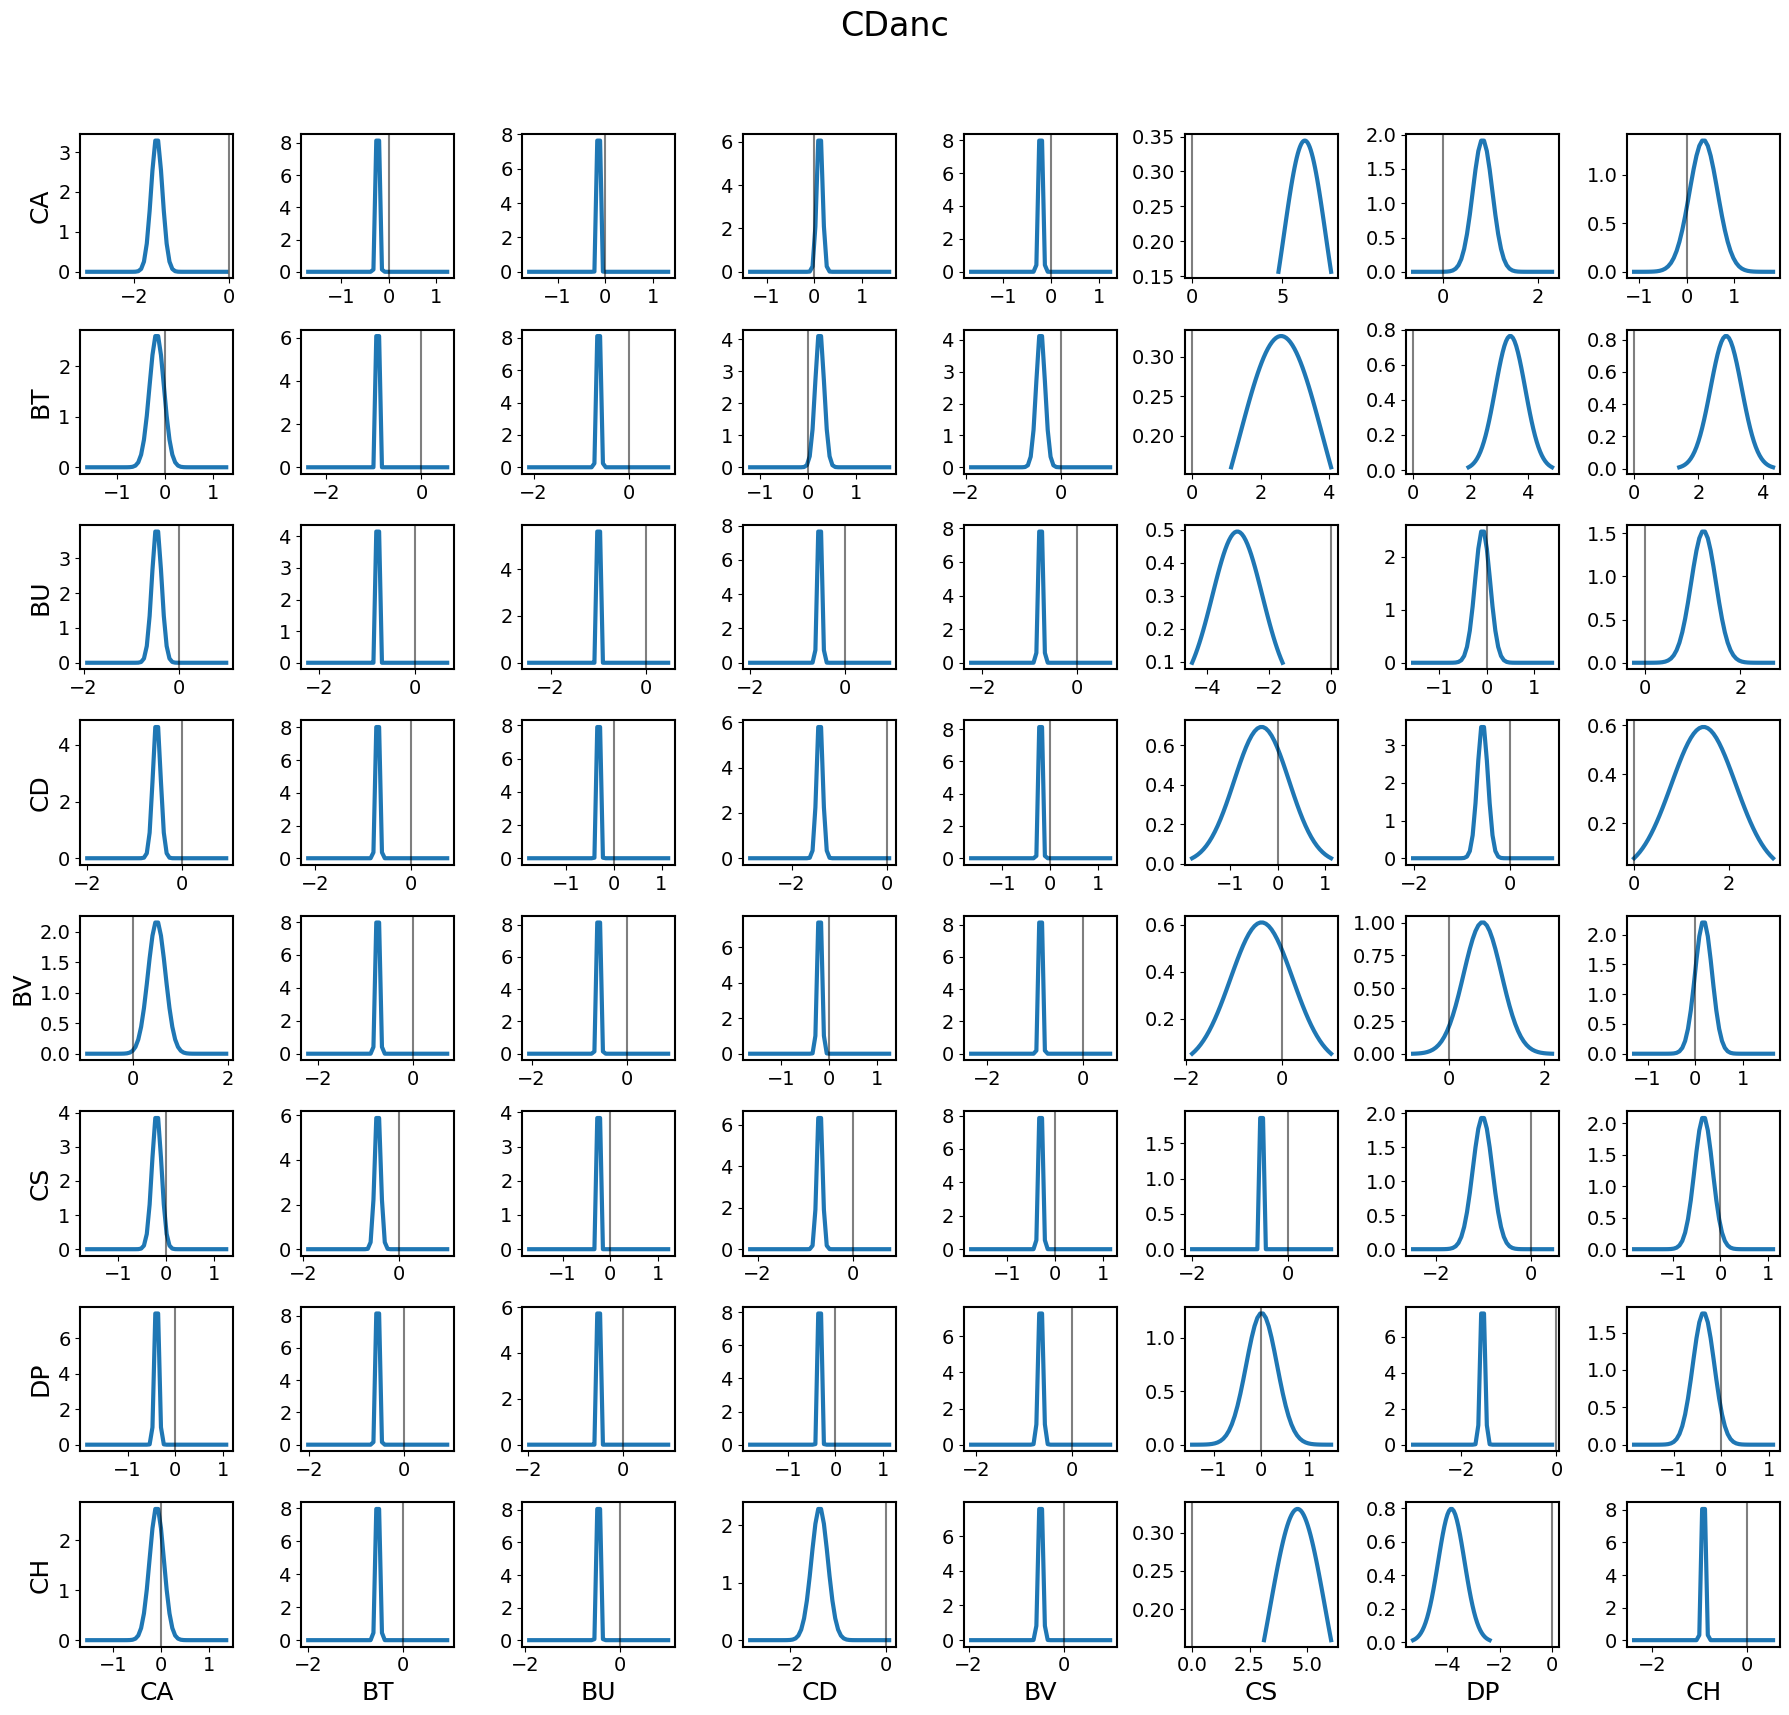

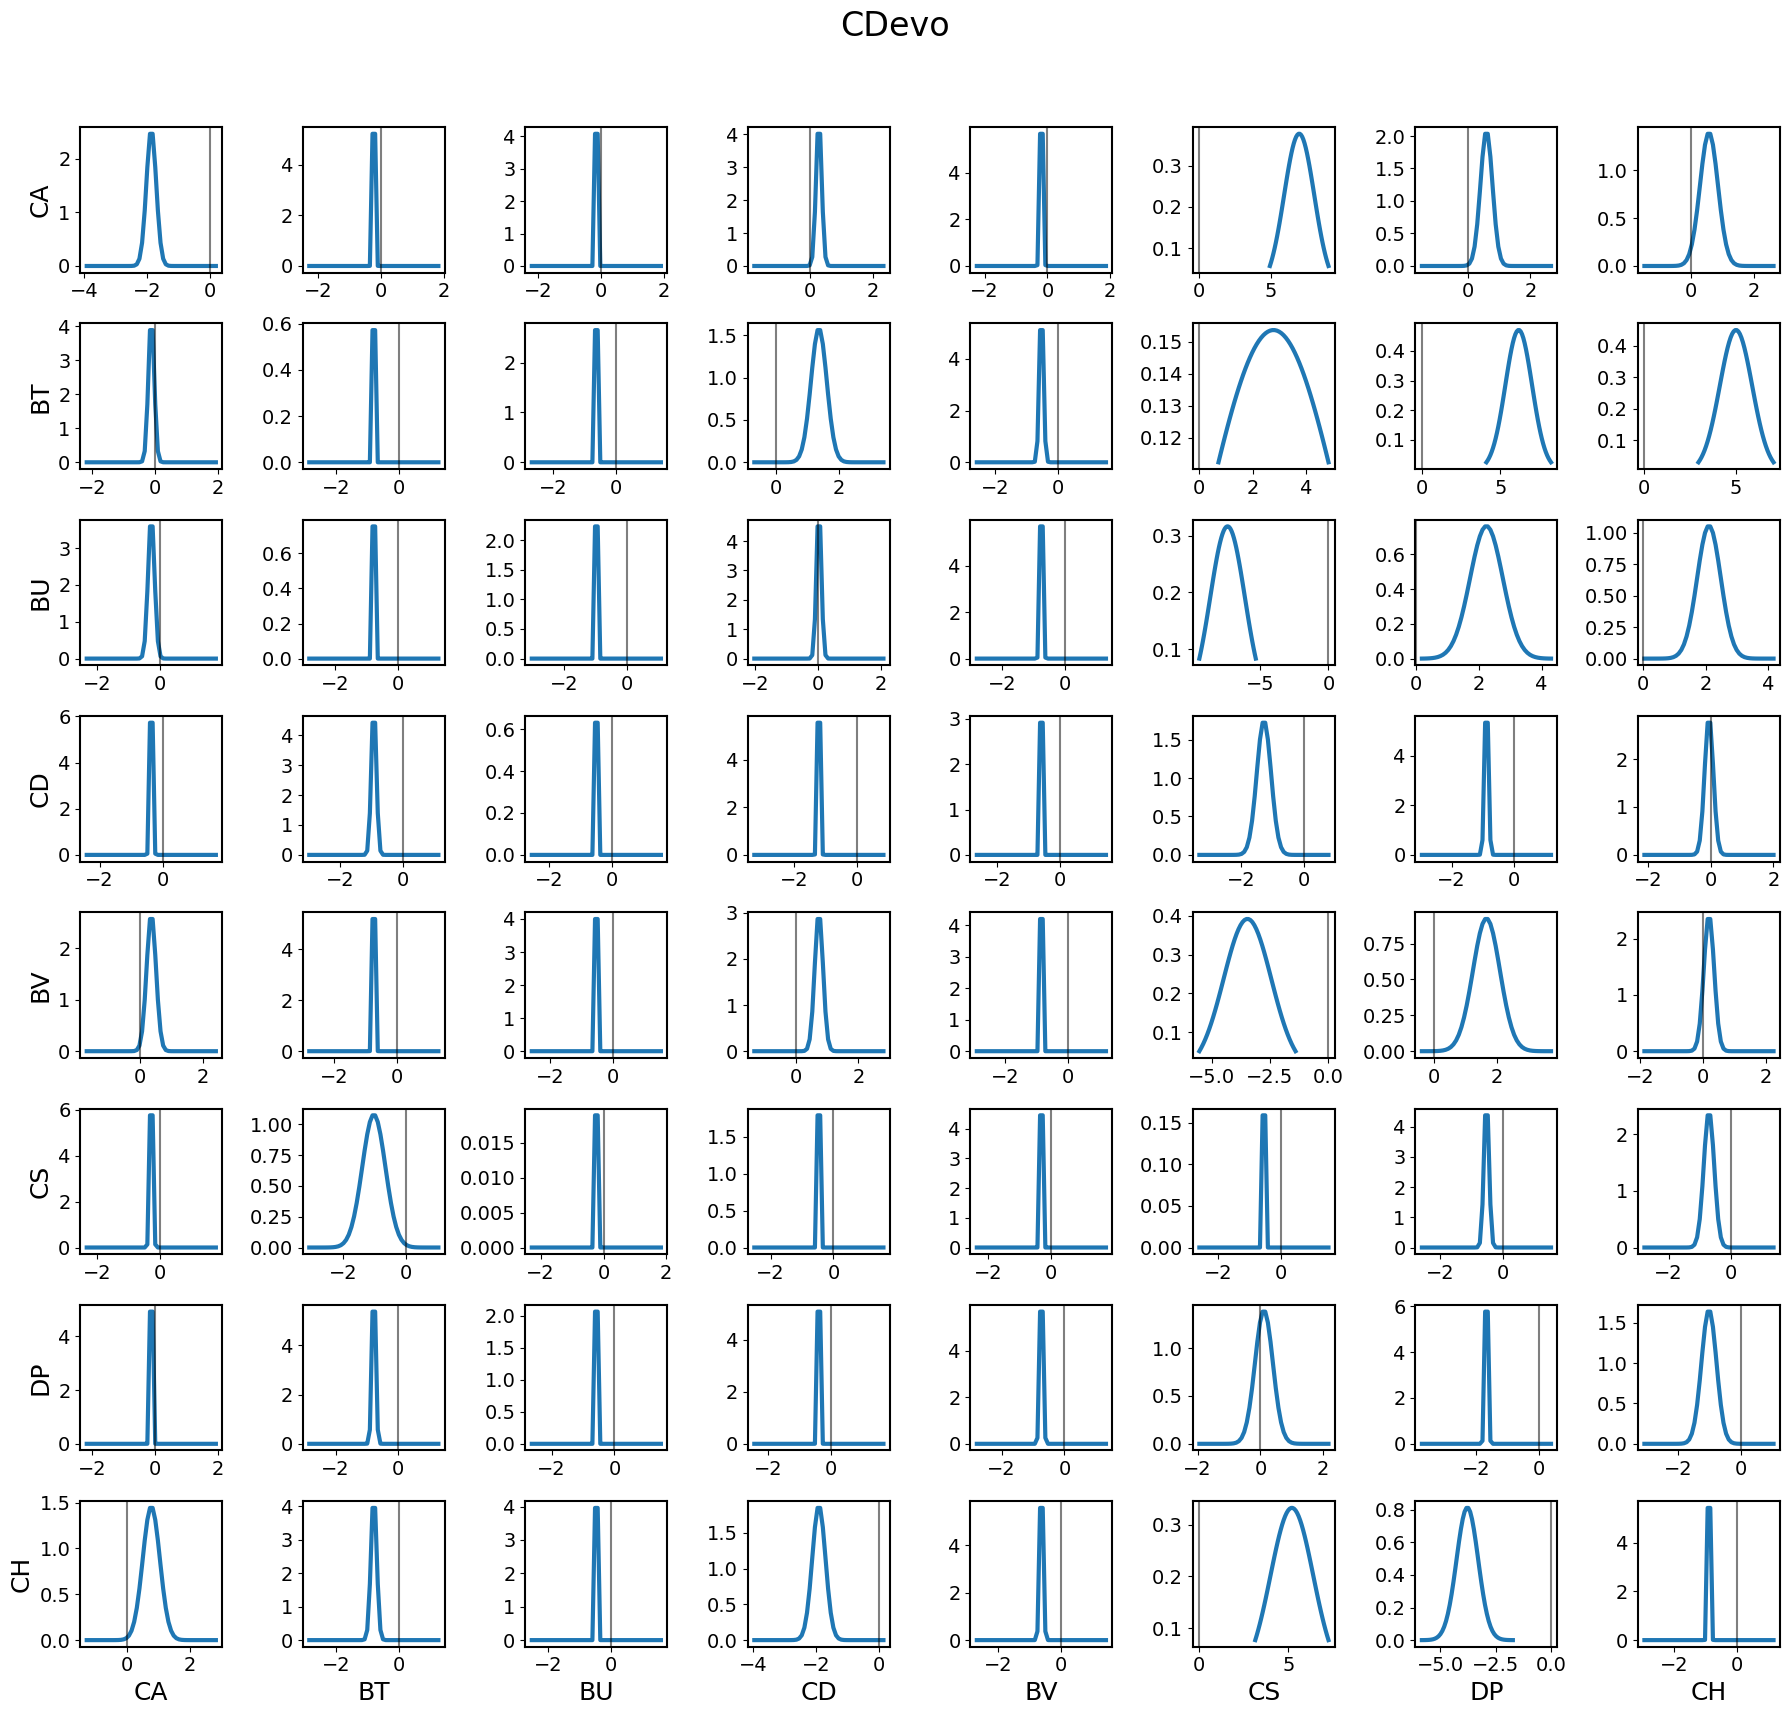

In [9]:
params = {'axes.linewidth': 1.5}
plt.rcParams.update(params)

exp_names = []
for file in files:
    # define strain name
    strain = file.split("_")[0]
    
    # import data
    df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
    df.sort_values(by=["Treatments", "Time"], inplace=True)
    
    # make sure that conditions have at least one measurement
    dfs = []
    for treatment, df_t in df.groupby("Treatments"):
        if df_t.shape[0] > 1:
            dfs.append(df_t)
    df = pd.concat(dfs)

    # determine species names 
    species = df.columns.values[2:]

    # save to df 
    param_df = pd.read_csv("params/"+strain+".csv")
    
    # list of parameter names 
    param_names = []
    for s1 in species:
        for s2 in species:
            param_names += [s1+"*"+s2]
    param_names = list(species) + param_names
    
    # plot parameter distribution
    n_species = len(species)
    Avec = param_df["Param value"].values[n_species:]
    Aij_std = param_df["Param stdv"].values[n_species:]

    plt.figure(figsize=(18,18))
    # set counter for parameter std. 
    k = 0

    for i in range(n_species):
        for j in range(n_species):
            plt.subplot(n_species, n_species, k+1)
            a = np.linspace(Avec[k]-np.std(Avec), Avec[k]+np.std(Avec))
            plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]), linewidth=3)
            plt.axvline(x=0, c='k', alpha=.5)
            k += 1
            if j == 0:
                plt.ylabel(species[i], fontsize=18)
            if i == n_species-1:
                plt.xlabel(species[j], fontsize=18)

            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            
    plt.suptitle(strain, fontsize=24)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("params/SET3/"+strain+".pdf")
    plt.show()